In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt

project_root = os.path.join(os.getcwd(), "..")
file_path = os.path.join(project_root, "data", "cleaned_us_renewable_energy_no_2024.csv")

df_clean = pd.read_csv(file_path)

ts_df = df_clean.groupby(['Date'])['Total_Renewable'].sum().reset_index()
ts_df.columns = ['ds', 'y']

In [41]:
train = ts_df[ts_df['ds'] < '2015-01-01']
val = ts_df[(ts_df['ds'] >= '2015-01-01') & (ts_df['ds'] < '2020-01-01')]
test = ts_df[ts_df['ds'] >= '2020-01-01']

In [43]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False)
model.fit(train)

future = model.make_future_dataframe(periods=len(val) + len(test), freq='MS')
forecast = model.predict(future)

forecast['ds'] = pd.to_datetime(forecast['ds'])

val_mask = (forecast['ds'] >= '2015-01-01') & (forecast['ds'] < '2020-01-01')
val_pred = forecast[val_mask]['yhat'].values
val_y = val['y'].values

print("Validation actual data length:", len(val_y))
print("Estimated data length:", len(val_pred))

mae = mean_absolute_error(val_y, val_pred)
print(f"Validation MAE: {mae:.2f}")

18:41:23 - cmdstanpy - INFO - Chain [1] start processing
18:41:23 - cmdstanpy - INFO - Chain [1] done processing


Validation actual data length: 60
Estimated data length: 60
Validation MAE: 29.13


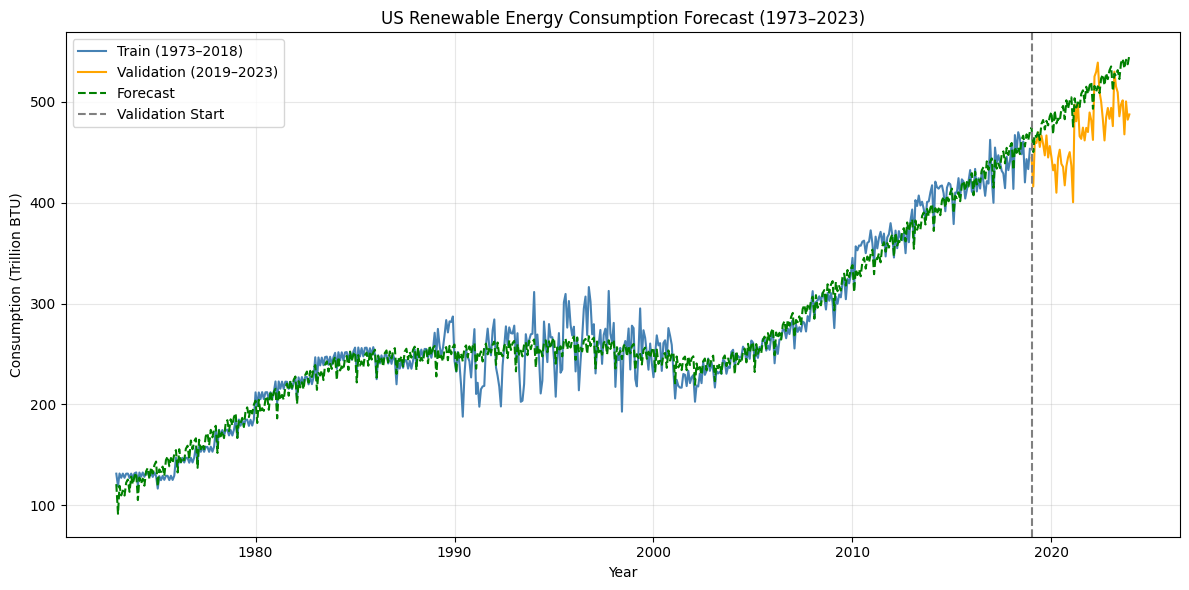

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Train (1973–2018)', color='steelblue')
plt.plot(val['ds'], val['y'], label='Validation (2019–2023)', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green', linestyle='--')

plt.axvline(x=pd.to_datetime('2019-01-01'), color='gray', linestyle='--', label='Validation Start')

plt.title('US Renewable Energy Consumption Forecast (1973–2023)')
plt.xlabel('Year')
plt.ylabel('Consumption (Trillion BTU)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

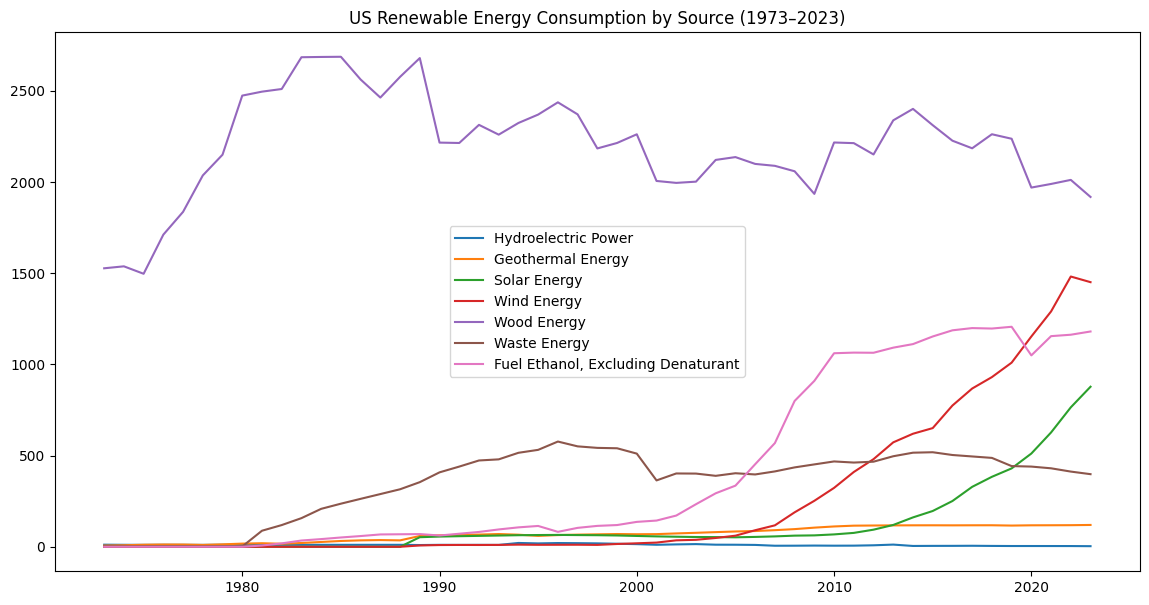

In [46]:
renewable_cols = [
    'Hydroelectric Power',
    'Geothermal Energy',
    'Solar Energy',
    'Wind Energy',
    'Wood Energy',
    'Waste Energy',
    'Fuel Ethanol, Excluding Denaturant'
]

yearly_total = df_clean.groupby('Year')[renewable_cols].sum().reset_index()

plt.figure(figsize=(14,7))
for col in renewable_cols:
    plt.plot(yearly_total['Year'], yearly_total[col], label=col)
plt.legend()
plt.title('US Renewable Energy Consumption by Source (1973–2023)')
plt.show()

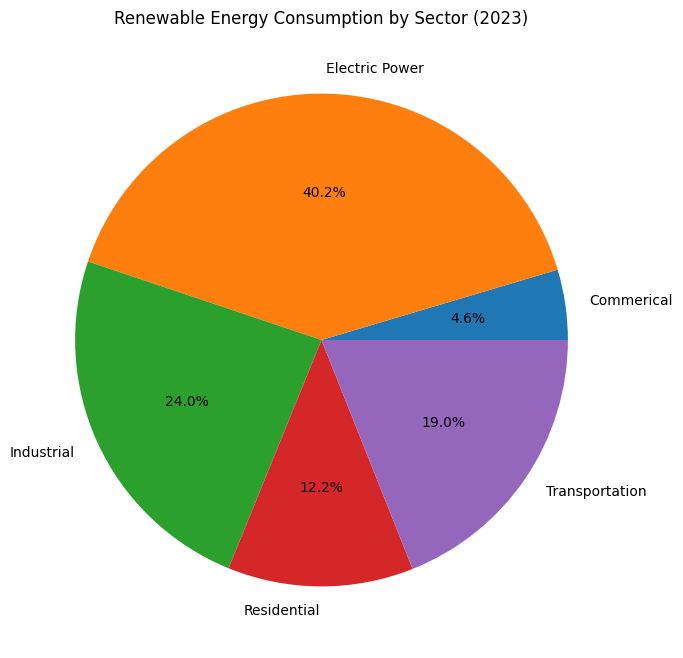

In [48]:
sector_2024 = df_clean[df_clean['Year'] == 2023].groupby('Sector')['Total_Renewable'].sum()
sector_2024.plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title('Renewable Energy Consumption by Sector (2023)')
plt.ylabel('')
plt.show()